In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

In [ ]:
from keras import backend as K
print(K.backend())

CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [ ]:
keras.datasets.cifar10.load_data()


# FCN

In [ ]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model_fcn = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model_fcn.summary()

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255

In [ ]:
model_fcn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [ ]:

start_time = time.time()
history = model_fcn.fit(x_train, y_train, batch_size=256, epochs=50, validation_split=0.05)
fcn_time = time.time() - start_time
fcn_score = model_fcn.evaluate(x_test.reshape(10000, 32*32*3), y_test, verbose=0)

# Save FCN results
np.savez("fcn_results.npz", accuracy=fcn_score[1], time=fcn_time, history=history.history)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4782 - loss: 1.4840 - val_accuracy: 0.4564 - val_loss: 1.5283
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4833 - loss: 1.4680 - val_accuracy: 0.4636 - val_loss: 1.5082
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4835 - loss: 1.4634 - val_accuracy: 0.4660 - val_loss: 1.5084
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4892 - loss: 1.4543 - val_accuracy: 0.4700 - val_loss: 1.5095
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4986 - loss: 1.4271 - val_accuracy: 0.4756 - val_loss: 1.4990
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5007 - loss: 1.4224 - val_accuracy: 0.4856 - val_loss: 1.4761
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4977 - loss: 1.4150 - val_accuracy: 0.4724 - val_loss: 1.4850
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5065 - loss: 1.4080 - val_accuracy: 0

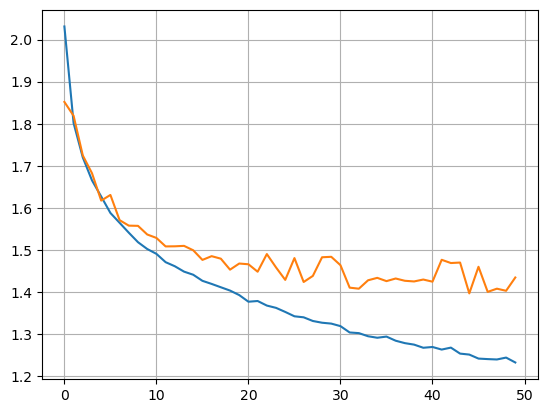

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [ ]:
test_scores = model_fcn.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 2s - 5ms/step - accuracy: 0.4953 - loss: 1.4505
Test loss: 1.4504817724227905
Test accuracy: 0.4952999949455261


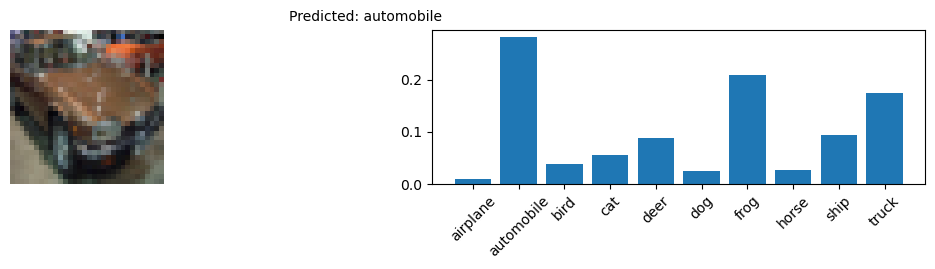

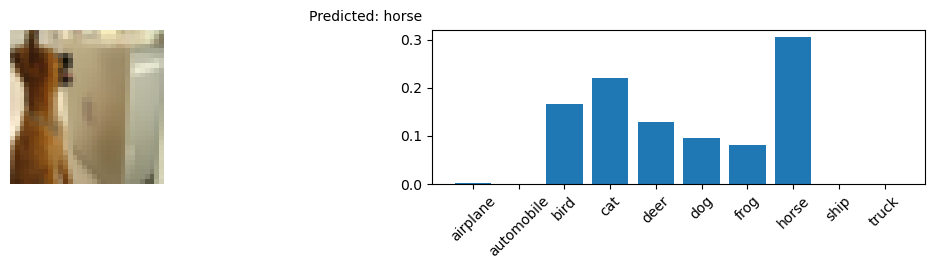

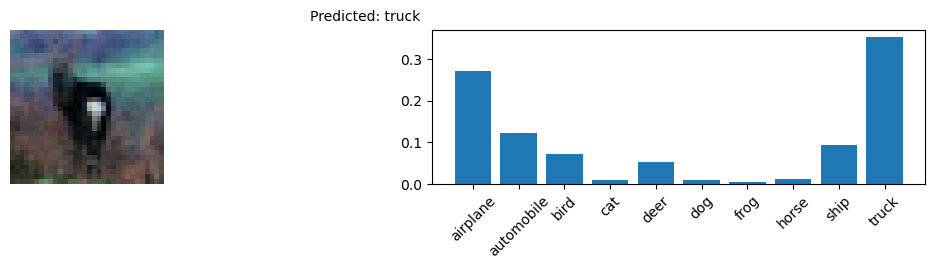

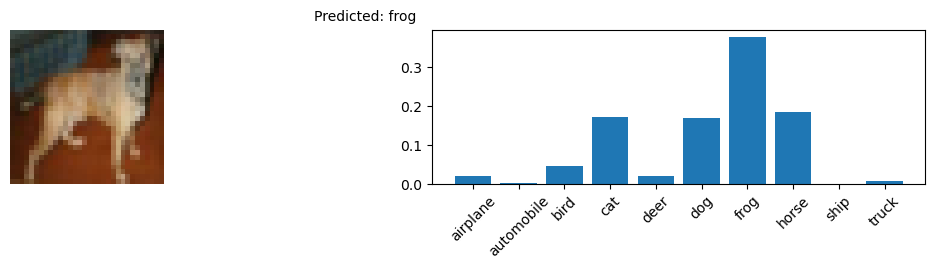

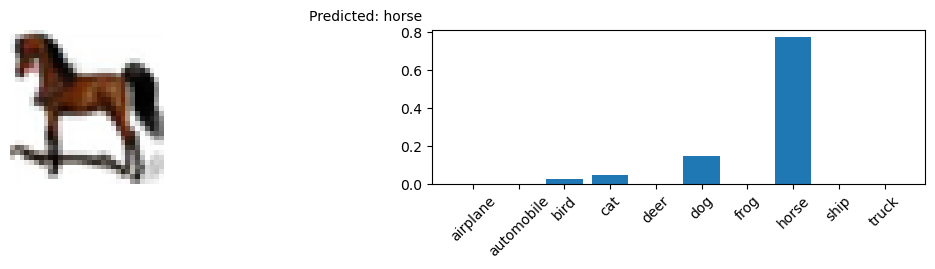

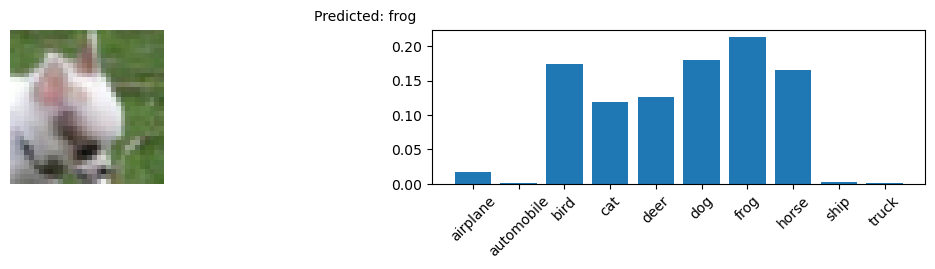

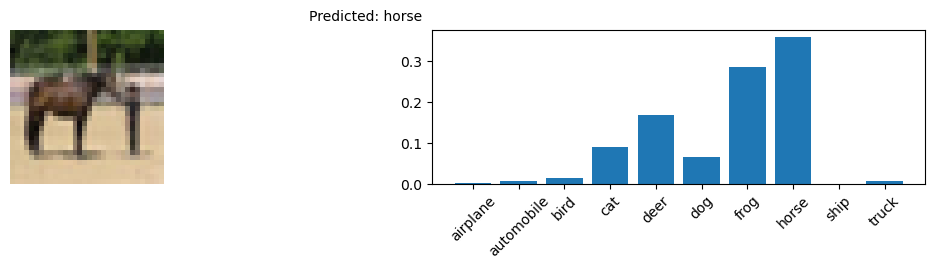

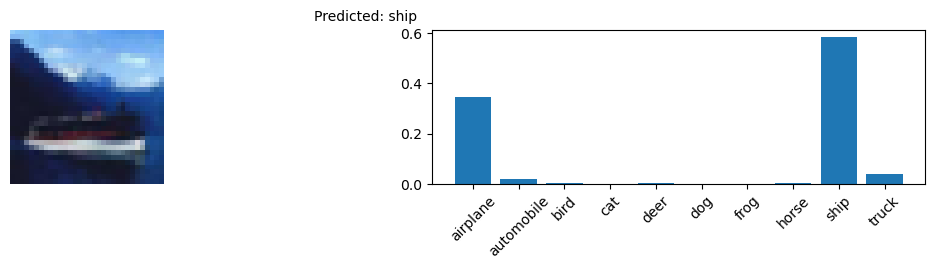

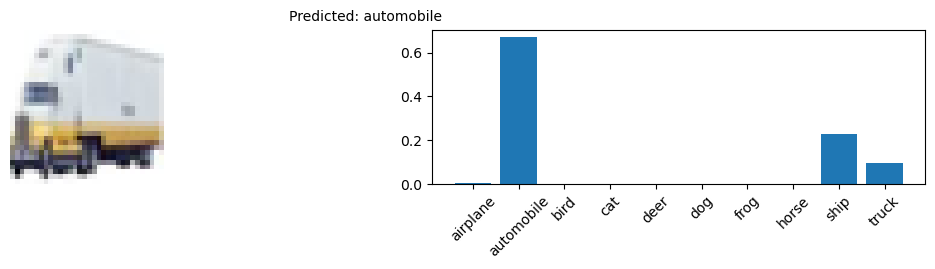

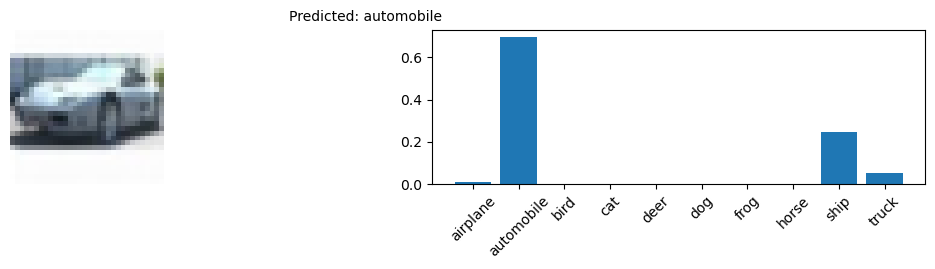

In [ ]:
x = x_test
y = model_fcn(x)
start = 2000

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

for k in range(10):
    plt.figure(figsize=(14, 2))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    plt.axis("off")

    # Display the prediction probabilities
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.bar(ind, y[start + k].numpy().flatten())  # Flatten prediction array
    plt.xticks(ind, label_names, rotation=45)  # Map labels to class names

    # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = label_names[predicted_class_index]  # Map index to class name

    # Set the title as the predicted class
    plt.suptitle(f"Predicted: {predicted_class}", fontsize=10)

    plt.show()

# CNN


In [ ]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Create the model
inputs_cnn = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs_cnn)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_cnn = keras.Model(inputs=inputs_cnn, outputs=outputs, name="mnist_model_cnn")

In [ ]:
model_cnn.summary()

Model: "mnist_model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 256
epochs = 80

model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)
cnn_time = time.time() - start_time
cnn_score = model_cnn.evaluate(x_test, y_test, verbose=0)
# Save CNN results
np.savez("cnn_results.npz", accuracy=cnn_score[1], time=cnn_time, history=history.history)


Epoch 1/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.2779 - loss: 1.9850 - val_accuracy: 0.4572 - val_loss: 1.5223
Epoch 2/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.4755 - loss: 1.4795 - val_accuracy: 0.5332 - val_loss: 1.3356
Epoch 3/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.5218 - loss: 1.3472 - val_accuracy: 0.5732 - val_loss: 1.2562
Epoch 4/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.5511 - loss: 1.2753 - val_accuracy: 0.5820 - val_loss: 1.2132
Epoch 5/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.5708 - loss: 1.2238 - val_accuracy: 0.6124 - val_loss: 1.1540
Epoch 6/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5914 - loss: 1.1752 - val_accuracy: 0.6352 - val_loss: 1.0999
Epoch 7/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.6062 - loss: 1.1363 - val_accuracy: 0.6308 - val_loss: 1.0922
Epoch 8/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6147 - loss: 1.1100 -

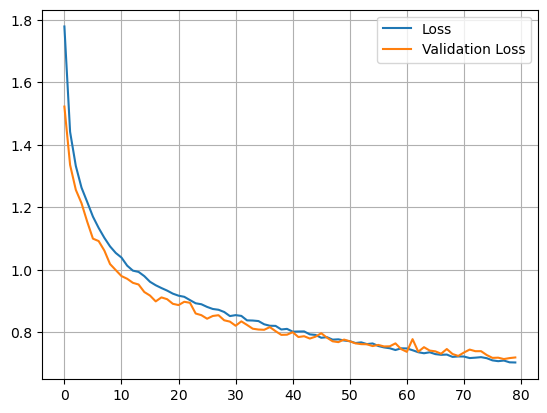

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7263365387916565
Test accuracy: 0.7487999796867371


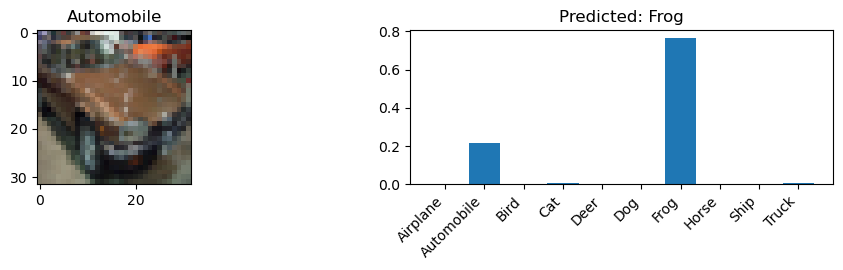

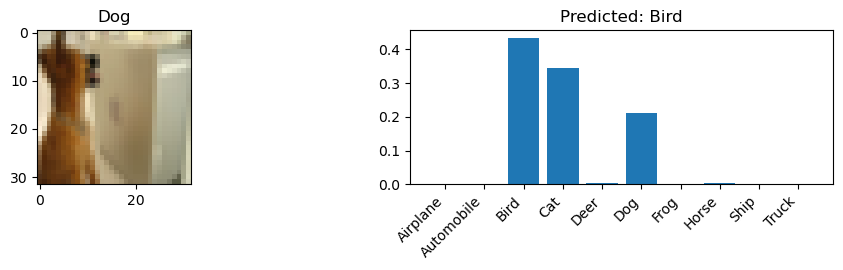

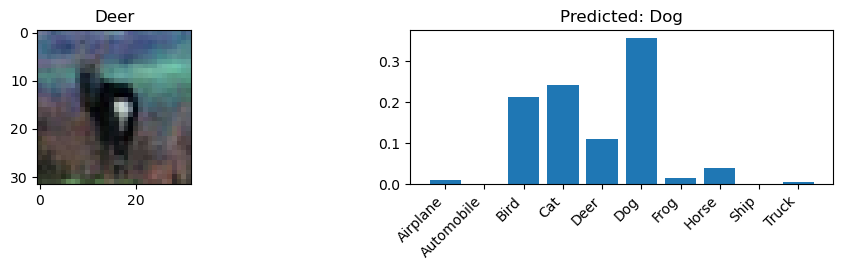

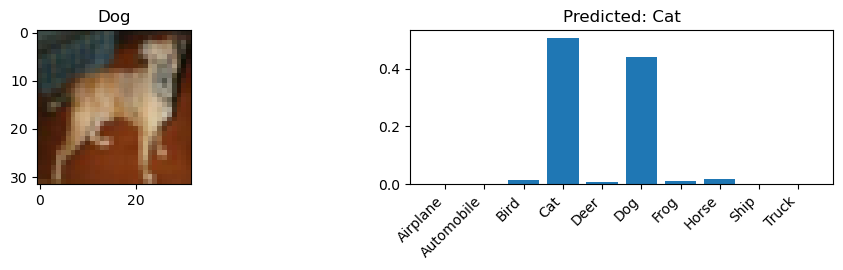

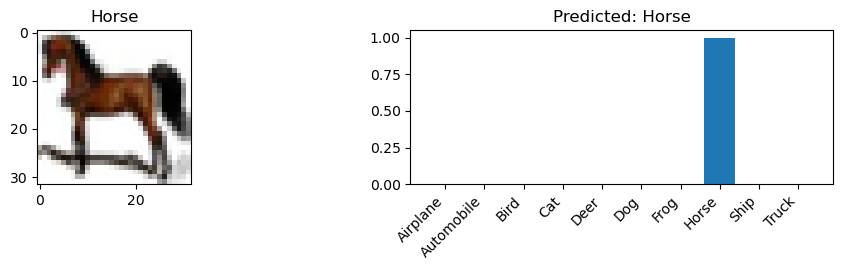

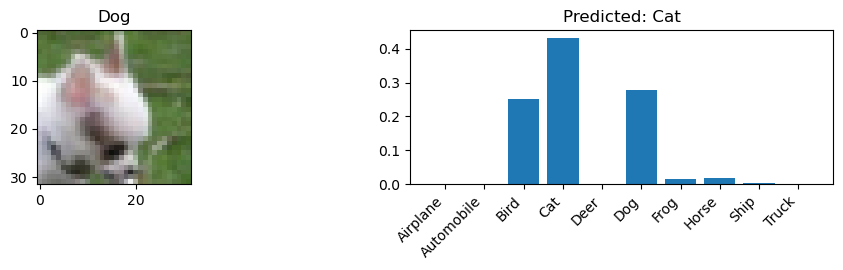

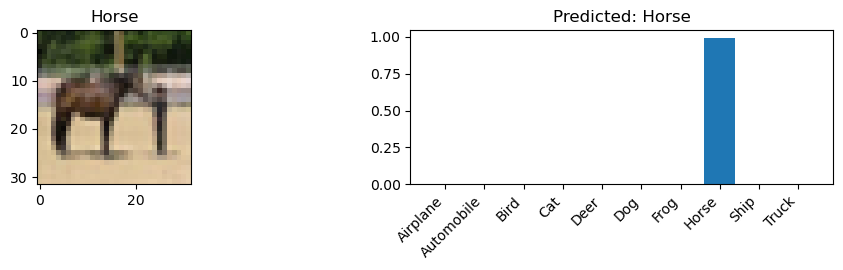

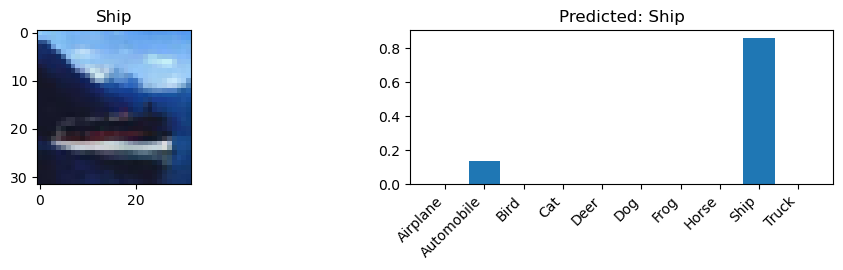

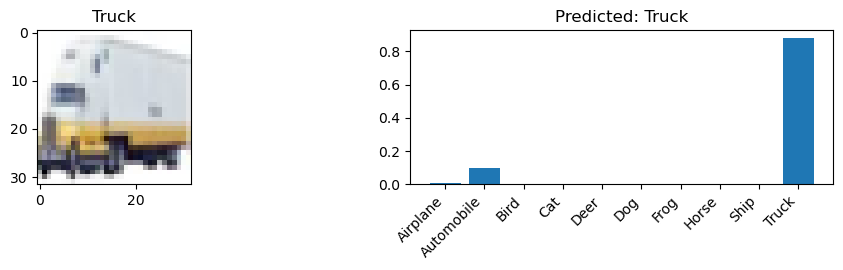

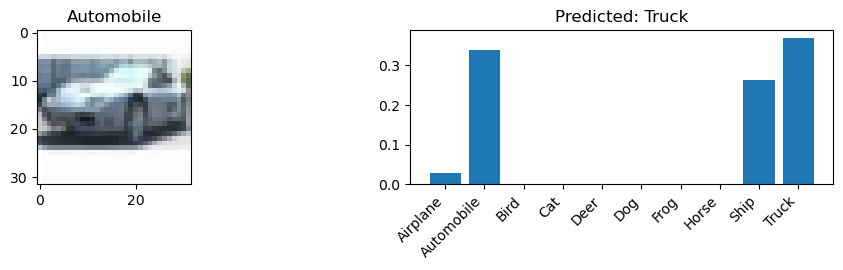

In [ ]:
names = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 
         4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

x = x_test
y = model_cnn(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(12, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
   
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(f"Predicted: {predicted_class}")
    
    # Tensorflow
    plt.xticks(range(10), [names[i] for i in range(10)], rotation=45, ha="right")

## FCN ja CNN tuloksien vertailu

FCN Test accuracy: 0.4952999949455261
CNN Test accuracy: 0.7487999796867371
FCN Training time: 1 minutes and 44 seconds
CNN Training time: 10 minutes and 14 seconds
FCN Number of parameters: 789258
CNN Number of parameters: 42442


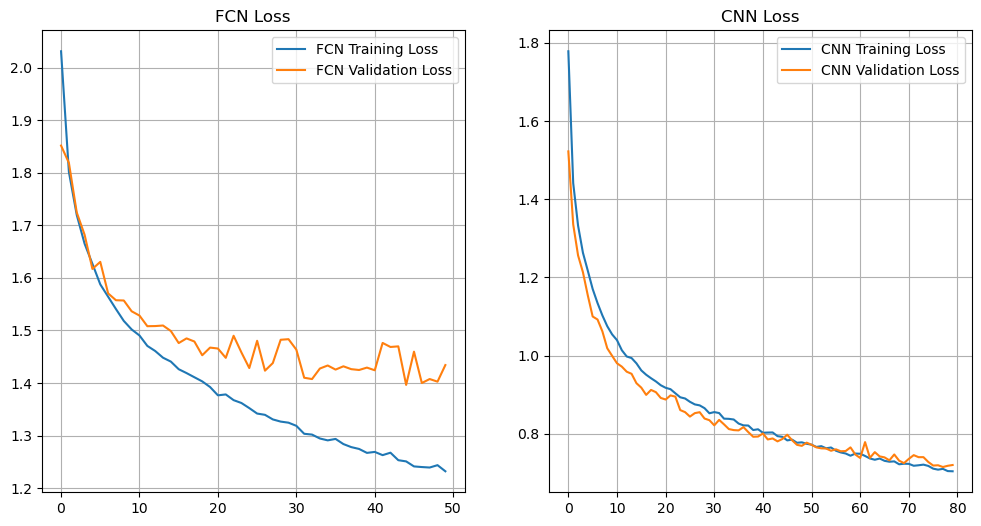

In [ ]:
# Load results
fcn_results = np.load("fcn_results.npz", allow_pickle=True)
cnn_results = np.load("cnn_results.npz", allow_pickle=True)

fcn_accuracy = fcn_results["accuracy"]
fcn_time = fcn_results["time"]
fcn_history = fcn_results["history"].item()

cnn_accuracy = cnn_results["accuracy"]
cnn_time = cnn_results["time"]
cnn_history = cnn_results["history"].item()

# Convert training time to minutes and seconds
fcn_minutes, fcn_seconds = divmod(fcn_time, 60)
cnn_minutes, cnn_seconds = divmod(cnn_time, 60)

# Print results
print(f"FCN Test accuracy: {fcn_accuracy}")
print(f"CNN Test accuracy: {cnn_accuracy}")
print(f"FCN Training time: {int(fcn_minutes)} minutes and {int(fcn_seconds)} seconds")
print(f"CNN Training time: {int(cnn_minutes)} minutes and {int(cnn_seconds)} seconds")
print(f"FCN Number of parameters: {model_fcn.count_params()}")
print(f"CNN Number of parameters: {model_cnn.count_params()}")

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fcn_history['loss'], label='FCN Training Loss')
plt.plot(fcn_history['val_loss'], label='FCN Validation Loss')
plt.legend()
plt.grid()
plt.title('FCN Loss')

plt.subplot(1, 2, 2)
plt.plot(cnn_history['loss'], label='CNN Training Loss')
plt.plot(cnn_history['val_loss'], label='CNN Validation Loss')
plt.legend()
plt.grid()
plt.title('CNN Loss')

plt.show()

## Visualisointia

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


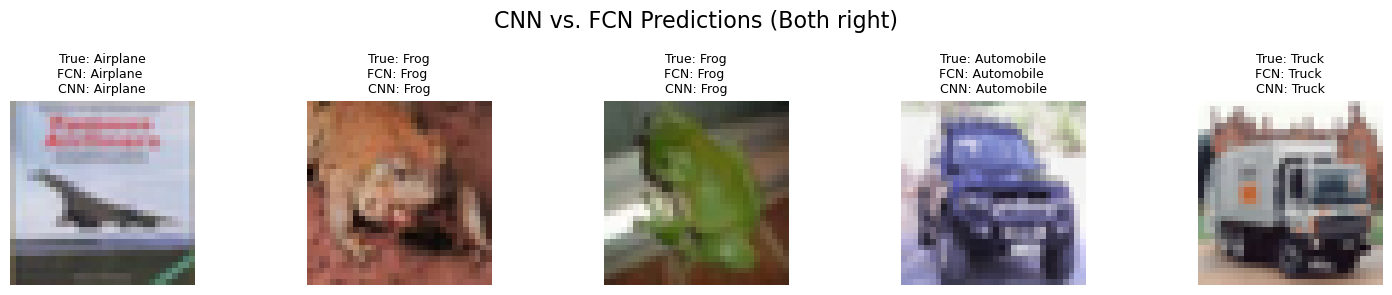

In [76]:
fcn_preds = np.argmax(model_fcn.predict(x_test.reshape(10000, 32*32*3)), axis=1)
cnn_preds = np.argmax(model_cnn.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

both_correct = np.where((cnn_preds == true_labels) & (fcn_preds == true_labels))[0]

plt.figure(figsize=(15, 5))
plt.suptitle("CNN vs. FCN Predictions (Both right)", fontsize=16)
for i, image_index in enumerate(both_correct[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[image_index])
    true_label = names[true_labels[image_index]]
    fcn_label = names[fcn_preds[image_index]]
    cnn_label = names[cnn_preds[image_index]]
    plt.title(f"True: {true_label}\nFCN: {fcn_label} \nCNN: {cnn_label}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

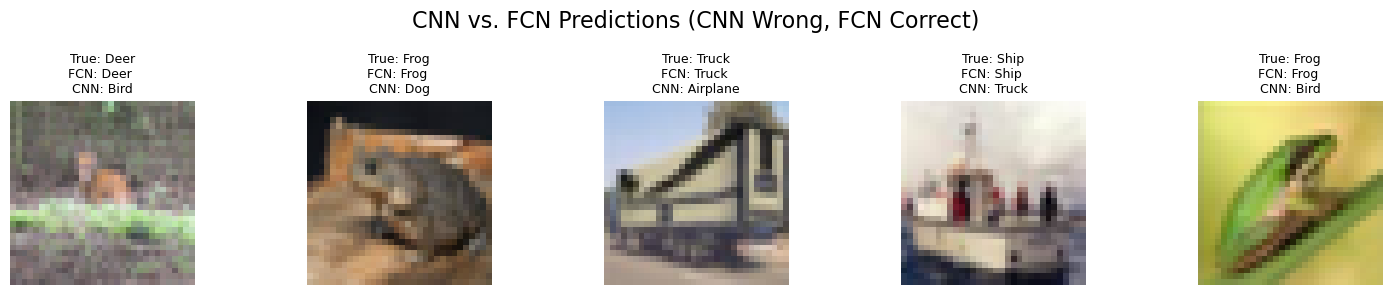

In [77]:
cnn_wrong_fcn_correct = np.where((cnn_preds != true_labels) & (fcn_preds == true_labels))[0]

plt.figure(figsize=(15, 5))
plt.suptitle("CNN vs. FCN Predictions (CNN Wrong, FCN Correct)", fontsize=16)
for i, image_index in enumerate(cnn_wrong_fcn_correct[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[image_index])
    true_label = names[true_labels[image_index]]
    fcn_label = names[fcn_preds[image_index]]
    cnn_label = names[cnn_preds[image_index]]
    plt.title(f"True: {true_label}\nFCN: {fcn_label} \nCNN: {cnn_label}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

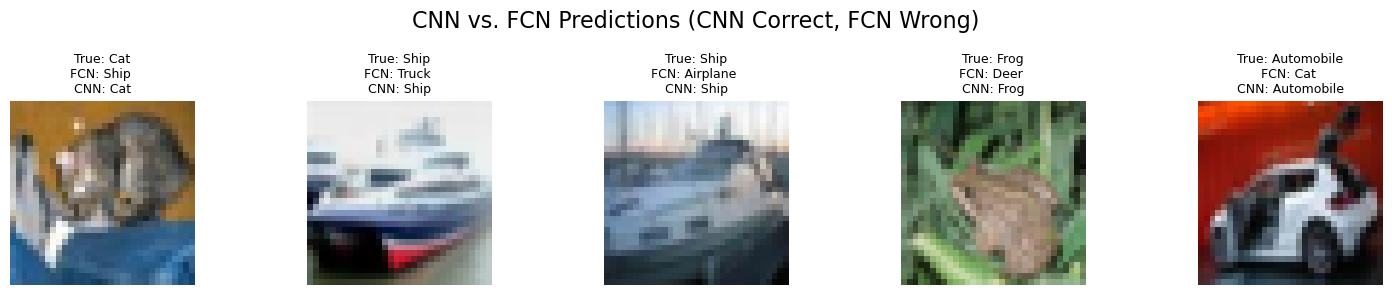

In [75]:
fcn_wrong_cnn_correct = np.where((fcn_preds != true_labels) & (cnn_preds == true_labels))[0]

plt.figure(figsize=(15, 5))
plt.suptitle("CNN vs. FCN Predictions (CNN Correct, FCN Wrong)", fontsize=16)
for i, image_index in enumerate(fcn_wrong_cnn_correct[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[image_index])
    true_label = names[true_labels[image_index]]
    fcn_label = names[fcn_preds[image_index]]
    cnn_label = names[cnn_preds[image_index]]
    plt.title(f"True: {true_label}\nFCN: {fcn_label} \nCNN: {cnn_label}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


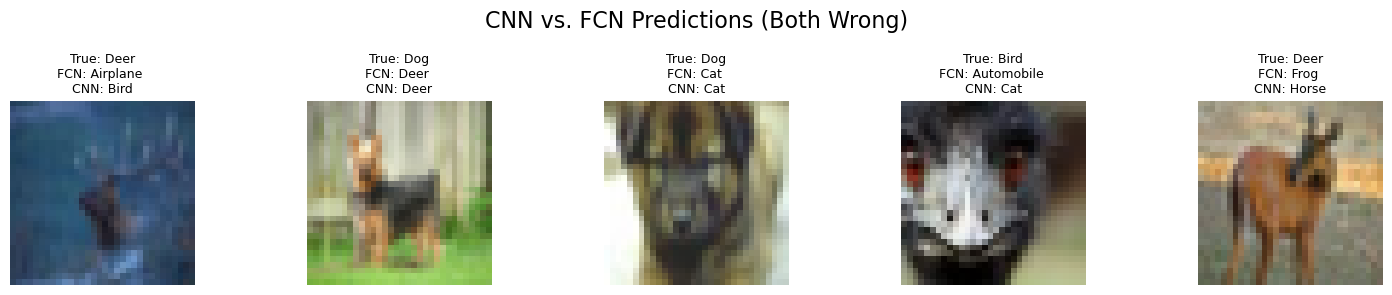

In [79]:
both_wrong = np.where((cnn_preds != true_labels) & (fcn_preds != true_labels))[0]

plt.figure(figsize=(15, 5))
plt.suptitle("CNN vs. FCN Predictions (Both Wrong)", fontsize=16)
for i, image_index in enumerate(both_wrong[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[image_index])
    true_label = names[true_labels[image_index]]
    fcn_label = names[fcn_preds[image_index]]
    cnn_label = names[cnn_preds[image_index]]
    plt.title(f"True: {true_label}\nFCN: {fcn_label} \nCNN: {cnn_label}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

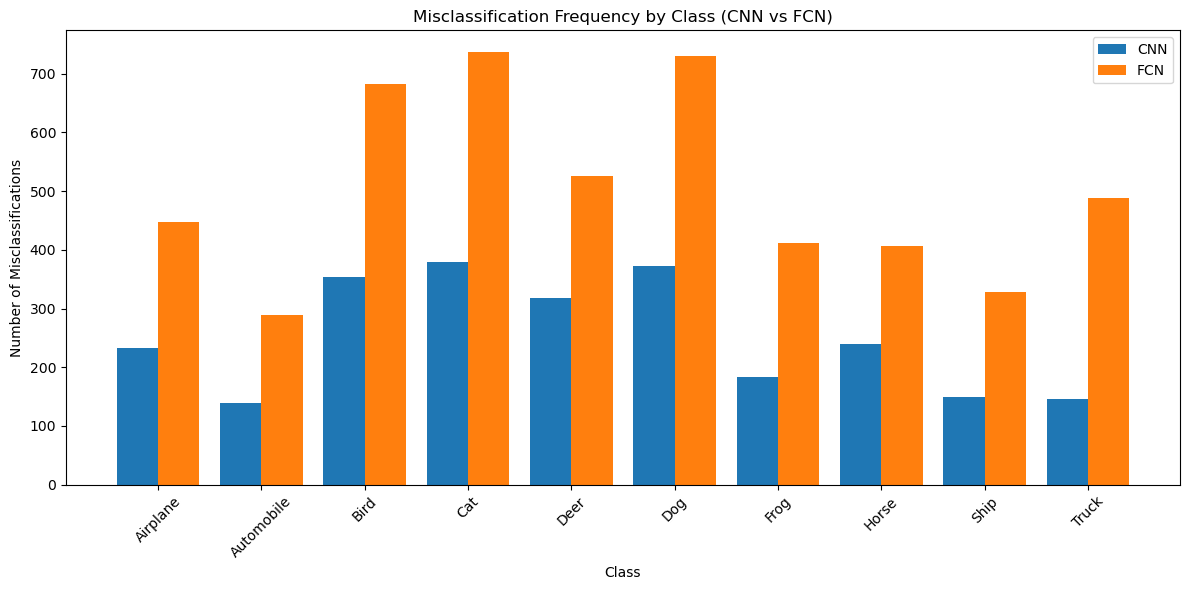

In [73]:
import matplotlib.pyplot as plt
import numpy as np

misclassified_indices_cnn = np.where(cnn_preds != true_labels)[0]
misclassified_indices_fcn = np.where(fcn_preds != true_labels)[0]

misclassified_classes_cnn = true_labels[misclassified_indices_cnn]
misclassified_classes_fcn = true_labels[misclassified_indices_fcn]

class_counts_cnn = np.bincount(misclassified_classes_cnn, minlength=len(names))
class_counts_fcn = np.bincount(misclassified_classes_fcn, minlength=len(names))

class_names = [names[i] for i in range(len(names))]

plt.figure(figsize=(12, 6))

plt.bar(np.arange(len(class_counts_cnn)) - 0.2, class_counts_cnn, width=0.4, label="CNN", color='#1f77b4')
plt.bar(np.arange(len(class_counts_fcn)) + 0.2, class_counts_fcn, width=0.4, label="FCN", color='#ff7f0e')

plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassification Frequency by Class (CNN vs FCN)')

plt.xticks(ticks=np.arange(len(class_counts_cnn)), labels=class_names, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


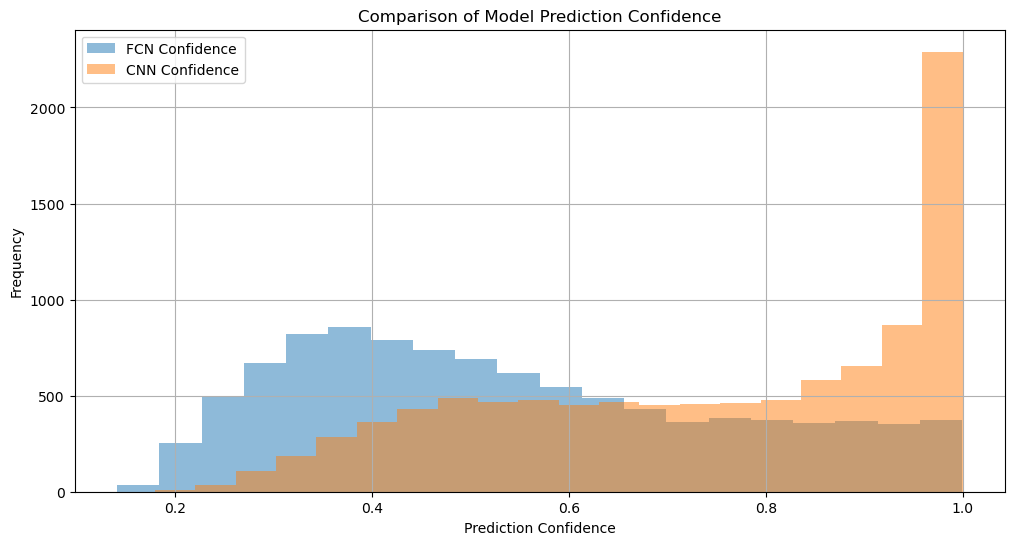

In [59]:
fcn_probs = model_fcn.predict(x_test.reshape(10000, 32*32*3))
cnn_probs = model_cnn.predict(x_test)

fcn_confidence = np.max(fcn_probs, axis=1)
cnn_confidence = np.max(cnn_probs, axis=1)

plt.figure(figsize=(12, 6))
plt.hist(fcn_confidence, bins=20, alpha=0.5, label="FCN Confidence")
plt.hist(cnn_confidence, bins=20, alpha=0.5, label="CNN Confidence")
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.legend()

plt.title("Comparison of Model Prediction Confidence")
plt.grid()
plt.show()
